**Секція 1. Логістична регресія з нуля.**

Будемо крок за кроком будувати модель лог регресії з нуля для передбачення, чи буде врожай більше за 80 яблук (задача подібна до лекційної, але на класифікацію).

Давайте нагадаємо основні формули для логістичної регресії.

### Функція гіпотези - обчислення передбачення у логістичній регресії:

$$
\hat{y} = \sigma(x W^T + b) = \frac{1}{1 + e^{-(x W^T + b)}}
$$

Де:
- $ \hat{y} $ — це ймовірність "позитивного" класу.
- $ x $ — це вектор (або матриця для набору прикладів) вхідних даних.
- $ W $ — це вектор (або матриця) вагових коефіцієнтів моделі.
- $ b $ — це зміщення (bias).
- $ \sigma(z) $ — це сигмоїдна функція активації.

### Як обчислюється сигмоїдна функція:

Сигмоїдна функція $ \sigma(z) $ має вигляд:

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

Ця функція перетворює будь-яке дійсне значення $ z $ в інтервал від 0 до 1, що дозволяє інтерпретувати вихід як ймовірність для логістичної регресії.

### Формула функції втрат для логістичної регресії (бінарна крос-ентропія):

Функція втрат крос-ентропії оцінює, наскільки добре модель передбачає класи, порівнюючи передбачені ймовірності $ \hat{y} $ із справжніми мітками $ y $. Формула наступна:

$$
L(y, \hat{y}) = - \left[ y \cdot \log(\hat{y}) + (1 - y) \cdot \log(1 - \hat{y}) \right]
$$

Де:
- $ y $ — це справжнє значення (мітка класу, 0 або 1).
- $ \hat{y} $ — це передбачене значення (ймовірність).



1.
Тут вже наведений код для ініціювання набору даних в форматі numpy. Перетворіть `inputs`, `targets` на `torch` тензори. Виведіть результат на екран.

In [1]:
import torch
import numpy as np

In [2]:
# Вхідні дані (temp, rainfall, humidity)
inputs = np.array([[73, 67, 43],
                   [91, 88, 64],
                   [87, 134, 58],
                   [102, 43, 37],
                   [69, 96, 70]], dtype='float32')

# Таргети (apples > 80)
targets = np.array([[0],
                    [1],
                    [1],
                    [0],
                    [1]], dtype='float32')

In [3]:
inputs_tensor = torch.from_numpy(inputs)
targets_tensor = torch.from_numpy(targets)
print(inputs_tensor)
print(targets_tensor)

tensor([[ 73.,  67.,  43.],
        [ 91.,  88.,  64.],
        [ 87., 134.,  58.],
        [102.,  43.,  37.],
        [ 69.,  96.,  70.]])
tensor([[0.],
        [1.],
        [1.],
        [0.],
        [1.]])


2. Ініціюйте ваги `w`, `b` для моделі логістичної регресії потрібної форми зважаючи на розмірності даних випадковими значеннями з нормального розподілу. Лишаю тут код для фіксації `random_seed`.

In [4]:
torch.random.manual_seed(1)
w = torch.randn(1, 3, requires_grad=True)
b = torch.randn(1, requires_grad=True)

print("Ваги w:", w)
print("Зміщення b:", b)

Ваги w: tensor([[0.6614, 0.2669, 0.0617]], requires_grad=True)
Зміщення b: tensor([0.6213], requires_grad=True)


Кількість ознак 3, цільова змінна 1, то ж w повинен мати розмірність (1,3), b - скаляр (1,)

3. Напишіть функцію `model`, яка буде обчислювати функцію гіпотези в логістичній регресії і дозволяти робити передбачення на основі введеного рядка даних і коефіцієнтів в змінних `w`, `b`.

  **Важливий момент**, що функція `model` робить обчислення на `torch.tensors`, тож для математичних обчислень використовуємо фукнціонал `torch`, наприклад:
  - обчсилення $e^x$: `torch.exp(x)`
  - обчсилення $log(x)$: `torch.log(x)`
  - обчислення середнього значення вектору `x`: `torch.mean(x)`

  Використайте функцію `model` для обчислення передбачень з поточними значеннями `w`, `b`.Виведіть результат обчислень на екран.

  Проаналізуйте передбачення. Чи не викликають вони у вас підозр? І якщо викликають, то чим це може бути зумовлено?

In [5]:
def model(x, w, b):
  z = x@w.T + b
  hyp = 1 / (1 + torch.exp(-z))
  return hyp

In [6]:
pred = model(inputs_tensor, w, b)
print(pred)

tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.]], grad_fn=<MulBackward0>)


Всі передбачення 1. Це, напевно, через великі значення випадкових w та b.

4. Напишіть функцію `binary_cross_entropy`, яка приймає на вхід передбачення моделі `predicted_probs` та справжні мітки в даних `true_labels` і обчислює значення втрат (loss)  за формулою бінарної крос-ентропії для кожного екземпляра та вертає середні втрати по всьому набору даних.
  Використайте функцію `binary_cross_entropy` для обчислення втрат для поточних передбачень моделі.

In [7]:
def binary_cross_entropy(predicted_probs, true_labels):
  epsilon = 1e-10 # Small value to avoid problem with log(0)
  loss = -(true_labels * torch.log(predicted_probs + epsilon) + (1 - true_labels) * torch.log(1 - predicted_probs + epsilon))

  return torch.mean(loss)

In [8]:
loss = binary_cross_entropy(pred, targets_tensor)
print('Втрати предебачень', loss)

Втрати предебачень tensor(9.2103, grad_fn=<MeanBackward0>)


5. Зробіть зворотнє поширення помилки і виведіть градієнти за параметрами `w`, `b`. Проаналізуйте їх значення. Як гадаєте, чому вони саме такі?

In [9]:
loss.backward()

In [10]:
print(w.grad)
print(b.grad)

tensor([[1.0201e-19, 9.3628e-20, 6.0090e-20]])
tensor([1.3974e-21])


Скористався додаванням дуже маленького значення, щоб loss і градієнти хоч якось відображались. Градієнти мають дуже мале значення через великі ініційовані ваги та натуральні(не масштабовані/нормалізовані вхідні дані). Оскільки логістична регресія чутлива до масштабів то виникає така ситуація.

**Що сталось?**

В цій задачі, коли ми ініціювали значення випадковими значеннями з нормального розподілу, насправді ці значення не були дуже гарними стартовими значеннями і привели до того, що градієнти стали дуже малими або навіть рівними нулю (це призводить до того, що градієнти "зникають"), і відповідно при оновленні ваг у нас не буде нічого змінюватись. Це називається `gradient vanishing`. Це відбувається через **насичення сигмоїдної функції активації.**

У нашій задачі ми використовуємо сигмоїдну функцію активації, яка має такий вигляд:

   $$
   \sigma(z) = \frac{1}{1 + e^{-z}}
   $$


Коли значення $z$ дуже велике або дуже мале, сигмоїдна функція починає "насичуватись". Це означає, що для великих позитивних $z$ сигмоїда наближається до 1, а для великих негативних — до 0. В цих діапазонах градієнти починають стрімко зменшуватись і наближаються до нуля (бо градієнт - це похідна, похідна на проміжку функції, де вона паралельна осі ОХ, дорівнює 0), що робить оновлення ваг неможливим.

![](https://editor.analyticsvidhya.com/uploads/27889vaegp.png)

У логістичній регресії $ z = x \cdot w + b $. Якщо ваги $w, b$ - великі, значення $z$ також буде великим, і сигмоїда перейде в насичену область, де градієнти дуже малі.

Саме це сталося в нашій задачі, де великі випадкові значення ваг викликали насичення сигмоїдної функції. Це в свою чергу призводить до того, що під час зворотного поширення помилки (backpropagation) модель оновлює ваги дуже повільно або зовсім не оновлює. Це називається проблемою **зникнення градієнтів** (gradient vanishing problem).

**Що ж робити?**
Ініціювати ваги маленькими значеннями навколо нуля. Наприклад ми можемо просто в існуючій ініціалізації ваги розділити на 1000. Можна також використати інший спосіб ініціалізації вагів - інформація про це [тут](https://www.geeksforgeeks.org/initialize-weights-in-pytorch/).

Як це робити - показую нижче. **Виконайте код та знову обчисліть передбачення, лосс і виведіть градієнти.**

А я пишу пояснення, чому просто не зробити

```
w = torch.randn(1, 3, requires_grad=True)/1000
b = torch.randn(1, requires_grad=True)/1000
```

Нам потрібно, аби тензори вагів були листовими (leaf tensors).

1. **Що таке листовий тензор**
Листовий тензор — це тензор, який був створений користувачем безпосередньо і з якого починається обчислювальний граф. Якщо такий тензор має `requires_grad=True`, PyTorch буде відслідковувати всі операції, виконані над ним, щоб правильно обчислювати градієнти під час навчання.

2. **Чому ми використовуємо `w.data` замість звичайних операцій**
Якщо ми просто виконали б операції, такі як `(w - 0.5) / 100`, ми б отримали **новий тензор**, який вже не був би листовим тензором, оскільки ці операції створюють **новий** тензор, а не модифікують існуючий.

  Проте, щоб залишити наші тензори ваги `w` та зміщення `b` листовими і продовжити можливість відстеження градієнтів під час тренування, ми використовуємо атрибут `.data`. Цей атрибут дозволяє **виконувати операції in-place (прямо на існуючому тензорі)** без зміни самого об'єкта тензора. Отже, тензор залишається листовим, і PyTorch може коректно обчислювати його градієнти.

3. **Чому важливо залишити тензор листовим**
Якщо тензор більше не є листовим (наприклад, через проведення операцій, що створюють нові тензори), ви не зможете отримати градієнти за допомогою `w.grad` чи `b.grad` після виклику `loss.backward()`. Це може призвести до втрати можливості оновлення параметрів під час тренування моделі. В нашому випадку ми хочемо, щоб тензори `w` та `b` накопичували градієнти, тому вони повинні залишатись листовими.

**Висновок:**
Ми використовуємо `.data`, щоб виконати операції зміни значень на ваги і зміщення **in-place**, залишаючи їх листовими тензорами, які можуть накопичувати градієнти під час навчання. Це дозволяє коректно працювати механізму зворотного поширення помилки (backpropagation) і оновлювати ваги моделі.

5. Виконайте код та знову обчисліть передбачення, лосс і знайдіть градієнти та виведіть всі ці тензори на екран.

In [11]:
torch.random.manual_seed(1)
w = torch.randn(1, 3, requires_grad=True)  # Листовий тензор
b = torch.randn(1, requires_grad=True)     # Листовий тензор

# in-place операції
w.data = w.data / 1000
b.data = b.data / 1000

In [12]:
pred = model(inputs_tensor, w, b)
print(pred)

tensor([[0.5174],
        [0.5220],
        [0.5244],
        [0.5204],
        [0.5190]], grad_fn=<MulBackward0>)


In [13]:
def binary_cross_entropy(predicted_probs, true_labels):

    loss = -(true_labels * torch.log(predicted_probs) + (1 - true_labels) * torch.log(1 - predicted_probs))

    return torch.mean(loss)

In [14]:
loss = binary_cross_entropy(pred, targets_tensor)
print('Втрати предебачень', loss)

Втрати предебачень tensor(0.6829, grad_fn=<MeanBackward0>)


In [15]:
loss.backward()

In [16]:
print(w.grad)
print(b.grad)

tensor([[ -5.4417, -18.9853, -10.0682]])
tensor([-0.0794])


6. Напишіть алгоритм градієнтного спуску, який буде навчати модель з використанням написаних раніше функцій і виконуючи оновлення ваг. Алгоритм має включати наступні кроки:

  1. Генерація прогнозів
  2. Обчислення втрат
  3. Обчислення градієнтів (gradients) loss-фукнції відносно ваг і зсувів
  4. Налаштування ваг шляхом віднімання невеликої величини, пропорційної градієнту (`learning_rate` домножений на градієнт)
  5. Скидання градієнтів на нуль

Виконайте градієнтний спуск протягом 1000 епох, обчисліть фінальні передбачення і проаналізуйте, чи вони точні?

In [17]:
def binary_cross_entropy(predicted_probs, true_labels):
    epsilon = 1e-8  # дуже маленьке значення для уникнення log(0)
    predicted_probs = torch.clamp(predicted_probs, epsilon, 1 - epsilon)
    loss = -(true_labels * torch.log(predicted_probs + epsilon) + (1 - true_labels) * torch.log(1 - predicted_probs + epsilon))

    return torch.mean(loss)

In [18]:
inputs_tensor = (inputs_tensor - inputs_tensor.mean(dim=0)) / inputs_tensor.std(dim=0)


In [19]:
def full_batch_gradient_descent(X, y, w, b, lr=0.01, epochs=1000):
    for epochs in range(epochs):
        #Генерація прогнозів
        pred = model(X, w, b)

        #Обчислення втрат
        loss = binary_cross_entropy(pred, y)

        #Обчислення градієнтів
        loss.backward()

        #Налаштування ваг
        with torch.no_grad():  # Щоб PyTorch не обчислював градієнти під час оновлення ваг
            w.data -= lr * w.grad
            b.data -= lr * b.grad

        #Обнулення градієнтів
        w.grad.zero_()
        b.grad.zero_()

        if (epochs + 1) % 100 == 0:
            print(f"Epoch [{epochs+1}/{epochs}], Loss: {loss.item():.4f}")
            print("Weights after epoch:", w)
            print("Bias after epoch:", b)
            print("Gradients for weights:", w.grad)
            print("Gradients for bias:", b.grad)

In [20]:
full_batch_gradient_descent(inputs_tensor, targets_tensor, w, b)

Epoch [100/99], Loss: 0.4129
Weights after epoch: tensor([[0.0005, 0.4533, 0.4196]], requires_grad=True)
Bias after epoch: tensor([0.0895], requires_grad=True)
Gradients for weights: tensor([[0., 0., 0.]])
Gradients for bias: tensor([0.])
Epoch [200/199], Loss: 0.3123
Weights after epoch: tensor([[-0.0173,  0.6443,  0.6606]], requires_grad=True)
Bias after epoch: tensor([0.1581], requires_grad=True)
Gradients for weights: tensor([[0., 0., 0.]])
Gradients for bias: tensor([0.])
Epoch [300/299], Loss: 0.2501
Weights after epoch: tensor([[-0.0172,  0.7916,  0.8530]], requires_grad=True)
Bias after epoch: tensor([0.2127], requires_grad=True)
Gradients for weights: tensor([[0., 0., 0.]])
Gradients for bias: tensor([0.])
Epoch [400/399], Loss: 0.2082
Weights after epoch: tensor([[-0.0081,  0.9103,  1.0128]], requires_grad=True)
Bias after epoch: tensor([0.2574], requires_grad=True)
Gradients for weights: tensor([[0., 0., 0.]])
Gradients for bias: tensor([0.])
Epoch [500/499], Loss: 0.1781
We

In [21]:
with torch.no_grad():
    final_predictions = model(inputs_tensor, w, b)
    print("\nФінальні передбачення після навчання:")
    print(final_predictions)


Фінальні передбачення після навчання:
tensor([[0.1518],
        [0.8432],
        [0.9412],
        [0.0399],
        [0.9279]])


In [22]:
# MSE loss
def mse(t1, t2):
    diff = t1 - t2
    return torch.sum(diff * diff) / diff.numel()

In [23]:
# Обчислимо loss
losss = mse(final_predictions, targets_tensor)
print(losss)

tensor(0.0116)


Модель чудово підігналась під дані

Довелось відмасштабувати вхідні дані, інакше виходили дуже маленькі значення передбачень.

**Секція 2. Створення лог регресії з використанням функціоналу `torch.nn`.**

Давайте повторно реалізуємо ту ж модель, використовуючи деякі вбудовані функції та класи з PyTorch.

Даних у нас буде побільше - тож, визначаємо нові масиви.

In [24]:
import torch.nn as nn

In [72]:
# Вхідні дані (temp, rainfall, humidity)
inputs = np.array([[73, 67, 43],
                   [91, 88, 64],
                   [87, 134, 58],
                   [102, 43, 37],
                   [69, 96, 70],
                   [73, 67, 43],
                   [91, 88, 64],
                   [87, 134, 58],
                   [102, 43, 37],
                   [69, 96, 70],
                   [73, 67, 43],
                   [91, 88, 64],
                   [87, 134, 58],
                   [102, 43, 37],
                   [69, 96, 70]], dtype='float32')

# Таргети (apples > 80)
targets = np.array([[0],
                    [1],
                    [1],
                    [0],
                    [1],
                    [0],
                    [1],
                    [1],
                    [0],
                    [1],
                    [0],
                    [1],
                    [1],
                    [0],
                    [1]], dtype='float32')

In [73]:
inputs = torch.from_numpy(inputs)
targets = torch.from_numpy(targets)

In [74]:
inputs

tensor([[ 73.,  67.,  43.],
        [ 91.,  88.,  64.],
        [ 87., 134.,  58.],
        [102.,  43.,  37.],
        [ 69.,  96.,  70.],
        [ 73.,  67.,  43.],
        [ 91.,  88.,  64.],
        [ 87., 134.,  58.],
        [102.,  43.,  37.],
        [ 69.,  96.,  70.],
        [ 73.,  67.,  43.],
        [ 91.,  88.,  64.],
        [ 87., 134.,  58.],
        [102.,  43.,  37.],
        [ 69.,  96.,  70.]])

7. Завантажте вхідні дані та мітки в PyTorch тензори та з них створіть датасет, який поєднує вхідні дані з мітками, використовуючи клас `TensorDataset`. Виведіть перші 3 елементи в датасеті.



In [28]:
from torch.utils.data import TensorDataset, DataLoader

In [81]:
train_ds = TensorDataset(inputs, targets)
train_ds[0:3]

(tensor([[ 73.,  67.,  43.],
         [ 91.,  88.,  64.],
         [ 87., 134.,  58.]]),
 tensor([[0.],
         [1.],
         [1.]]))

8. Визначте data loader з класом **DataLoader** для підготовленого датасету `train_ds`, встановіть розмір батчу на 5 та увімкніть перемішування даних для ефективного навчання моделі. Виведіть перший елемент в дата лоадері.

In [82]:
batch_size = 5
train_dl = DataLoader(train_ds, batch_size, shuffle=True)


In [69]:
batch = next(iter(train_dl))
inputs, labels = batch

first_input = inputs[0]
first_label = labels[0]

print("First input:", first_input)
print("First label:", first_label)

First input: tensor([ 87., 134.,  58.])
First label: tensor([1.])


9. Створіть клас `LogReg` для логістичної регресії, наслідуючи модуль `torch.nn.Module` за прикладом в лекції (в частині про FeedForward мережі).

  У нас модель складається з лінійної комбінації вхідних значень і застосування фукнції сигмоїда. Тож, нейромережа буде складатись з лінійного шару `nn.Linear` і використання активації `nn.Sigmid`. У створеному класі мають бути реалізовані методи `__init__` з ініціалізацією шарів і метод `forward` для виконання прямого проходу моделі через лінійний шар і функцію активації.

  Створіть екземпляр класу `LogReg` в змінній `model`.

In [63]:
class LogReg(nn.Module):
    # Initialize the layers
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(3, 1)
        self.act1 = nn.Sigmoid() # Activation function

    def forward(self, x):
        x = self.linear1(x)
        x = self.act1(x)
        return x

In [64]:
model = LogReg()

10. Задайте оптимізатор `Stockastic Gradient Descent` в змінній `opt` для навчання моделі логістичної регресії. А також визначіть в змінній `loss` функцію втрат `binary_cross_entropy` з модуля `torch.nn.functional` для обчислення втрат моделі. Обчисліть втрати для поточних передбачень і міток, а потім виведіть їх. Зробіть висновок, чи моделі вдалось навчитись?

In [39]:
import torch.nn.functional as F

In [90]:
opt = torch.optim.SGD(model.parameters(), lr=1e-5)

loss_fn = F.binary_cross_entropy
loss = loss_fn(model(inputs), targets)
print(loss)

tensor(5.1916, grad_fn=<BinaryCrossEntropyBackward0>)


11. Візьміть з лекції функцію для тренування моделі з відстеженням значень втрат і навчіть щойно визначену модель на 1000 епохах. Виведіть після цього графік зміни loss, фінальні передбачення і значення таргетів.

In [92]:
# Модифікована функцію fit для відстеження втрат
def fit_return_loss(num_epochs, model, loss_fn, opt, train_dl):
    losses = []
    for epoch in range(num_epochs):
        # Ініціалізуємо акумулятор для втрат
        total_loss = 0

        for xb, yb in train_dl:
            # Генеруємо передбачення
            pred = model(xb)

            # Обчислюємо втрати
            loss = loss_fn(pred, yb)

            # Виконуємо градієнтний спуск
            loss.backward()
            opt.step()
            opt.zero_grad()

            # Накопичуємо втрати
            total_loss += loss.item()

        # Обчислюємо середні втрати для епохи
        avg_loss = total_loss / len(train_dl)
        losses.append(avg_loss)

        # Виводимо підсумок епохи
        if (epoch + 1) % 50 == 0:
          print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}')
    return losses

In [93]:
loss = fit_return_loss(1000, model, loss_fn, opt, train_dl)

Epoch [50/1000], Loss: 0.7788
Epoch [100/1000], Loss: 0.7693
Epoch [150/1000], Loss: 0.7564
Epoch [200/1000], Loss: 0.7494
Epoch [250/1000], Loss: 0.7394
Epoch [300/1000], Loss: 0.7284
Epoch [350/1000], Loss: 0.7219
Epoch [400/1000], Loss: 0.7146
Epoch [450/1000], Loss: 0.7043
Epoch [500/1000], Loss: 0.6983
Epoch [550/1000], Loss: 0.6924
Epoch [600/1000], Loss: 0.6866
Epoch [650/1000], Loss: 0.6769
Epoch [700/1000], Loss: 0.6734
Epoch [750/1000], Loss: 0.6642
Epoch [800/1000], Loss: 0.6588
Epoch [850/1000], Loss: 0.6527
Epoch [900/1000], Loss: 0.6478
Epoch [950/1000], Loss: 0.6436
Epoch [1000/1000], Loss: 0.6401


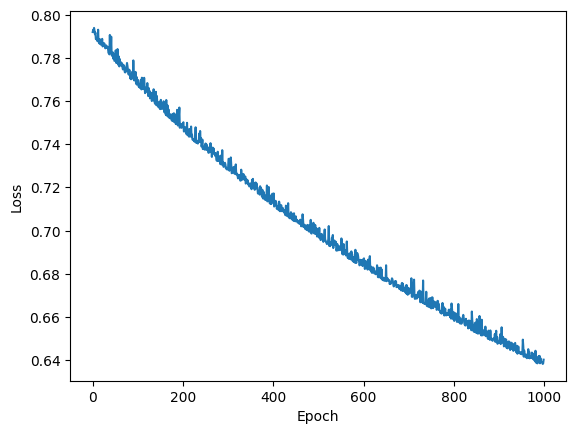

In [94]:
import matplotlib.pyplot as plt
plt.plot(loss)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [95]:
preds = model(inputs)
preds

tensor([[0.8950],
        [0.4652],
        [1.0000],
        [0.0022],
        [0.8498],
        [0.8950],
        [0.4652],
        [1.0000],
        [0.0022],
        [0.8498],
        [0.8950],
        [0.4652],
        [1.0000],
        [0.0022],
        [0.8498]], grad_fn=<SigmoidBackward0>)

In [96]:
preds.int()

tensor([[0],
        [0],
        [1],
        [0],
        [0],
        [0],
        [0],
        [1],
        [0],
        [0],
        [0],
        [0],
        [1],
        [0],
        [0]], dtype=torch.int32)

In [97]:
targets

tensor([[0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.]])